<a href="https://colab.research.google.com/github/yg3102-del/sparkly-pickle/blob/main/project_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NYC Motor Vehicle Collisions – Initial Data Exploration

In [ ]:
import pandas as pd

import requests
api_url = "https://data.cityofnewyork.us/resource/f55k-p6yu.json"
df = pd.read_json(api_url)
df.head()

,unique_id,collision_id,crash_date,crash_time,person_id,person_type,person_injury,vehicle_id,ped_role,person_sex,...,ejection,emotional_status,bodily_injury,position_in_vehicle,safety_equipment,complaint,ped_location,ped_action,contributing_factor_1,contributing_factor_2
0,10249006,4229554,2019-10-26T00:00:00.000,2026-02-04 09:43:00,31aa2bc0-f545-444f-8cdb-f1cb5cf00b89,Occupant,Unspecified,19141108.0,Registrant,U,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10255054,4230587,2019-10-25T00:00:00.000,2026-02-04 15:15:00,4629e500-a73e-48dc-b8fb-53124d124b80,Occupant,Unspecified,19144075.0,Passenger,F,...,Not Ejected,Does Not Apply,Does Not Apply,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,Does Not Apply,NaN,NaN,NaN,NaN
2,10253177,4230550,2019-10-26T00:00:00.000,2026-02-04 17:55:00,ae48c136-1383-45db-83f4-2a5eecfb7cff,Occupant,Unspecified,19143133.0,Registrant,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6650180,3565527,2016-11-21T00:00:00.000,2026-02-04 13:05:00,2782525,Occupant,Unspecified,NaN,Notified Person,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10255516,4231168,2019-10-25T00:00:00.000,2026-02-04 11:16:00,e038e18f-40fb-4471-99cf-345eae36e064,Occupant,Unspecified,19144329.0,Passenger,F,...,Not Ejected,Does Not Apply,Does Not Apply,Right rear passenger or motorcycle sidecar pas...,Lap Belt,Does Not Apply,NaN,NaN,NaN,NaN


In [ ]:
len(df)

1000

In [ ]:
df.columns

Index(['unique_id', 'collision_id', 'crash_date', 'crash_time', 'person_id',
       'person_type', 'person_injury', 'vehicle_id', 'ped_role', 'person_sex',
       'person_age', 'ejection', 'emotional_status', 'bodily_injury',
       'position_in_vehicle', 'safety_equipment', 'complaint', 'ped_location',
       'ped_action', 'contributing_factor_1', 'contributing_factor_2'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   unique_id              1000 non-null   int64         
 1   collision_id           1000 non-null   int64         
 2   crash_date             1000 non-null   object        
 3   crash_time             1000 non-null   datetime64[ns]
 4   person_id              1000 non-null   object        
 5   person_type            1000 non-null   object        
 6   person_injury          1000 non-null   object        
 7   vehicle_id             945 non-null    float64       
 8   ped_role               1000 non-null   object        
 9   person_sex             902 non-null    object        
 10  person_age             777 non-null    float64       
 11  ejection               504 non-null    object        
 12  emotional_status       517 non-null    object        
 13  bodi

In [ ]:
import requests
import pandas as pd

api_url = "https://data.cityofnewyork.us/resource/f55k-p6yu.json"

limit = 50000
offset = 0
dfs = []

while True:
    url = (
        f"{api_url}"
        f"?$where=crash_date >= '2025-01-01T00:00:00.000'"
        f"&$order=crash_date"
        f"&$limit={limit}"
        f"&$offset={offset}"
    )
#since there are too many rows in the dataset, we are only choosing the crach starting from 2025
    data = requests.get(url).json()

    if not data:
        break

    dfs.append(pd.DataFrame(data))
    offset += limit
    print(f"Fetched {offset} rows...")

df_2025 = pd.concat(dfs, ignore_index=True)
print("Final shape:", df_2025.shape)

Fetched 50000 rows...
Fetched 100000 rows...
Fetched 150000 rows...
Fetched 200000 rows...
Fetched 250000 rows...
Fetched 300000 rows...
Fetched 350000 rows...
Final shape: (313315, 21)


## Research Questions

Here are the research questions for our analysis:

1.  **How do injury and fatality outcomes differ across types of road users (pedestrians, cyclists, and motor vehicle occupants) in New York City since 2025?**
2.  **Are there differences in the distribution of traffic-related injuries and fatalities across NYC boroughs since 2025? (For this question we need to merge this dataset with another dataset called Motor Vehicle Collisions - Crashes, which includes specific location information so we can later create a gic map)**
3.  **Do traffic-related injuries and fatalities show temporal patterns over time (e.g., by month) in NYC since 2025?**

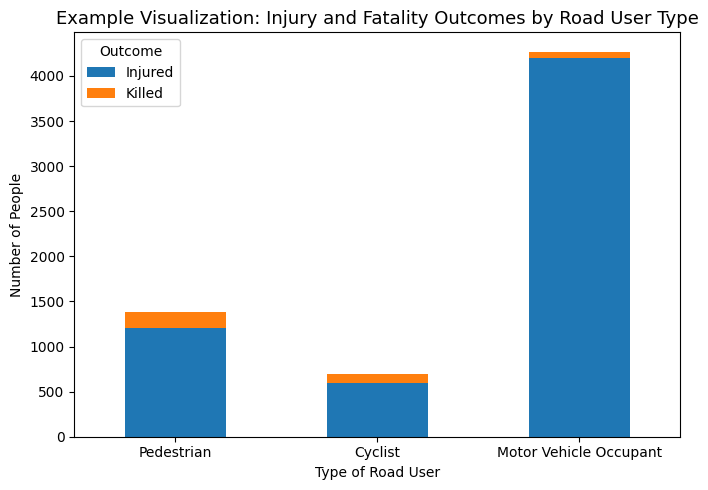

In [ ]:
#In response to the first research question
import pandas as pd
import matplotlib.pyplot as plt

# Fake data for visualization only
rq1_data = pd.DataFrame({
    "Injured": [1200, 600, 4200], #just using fake data since the real one has lots of unspecified data which need to be cleaned later
    "Killed":  [180, 90, 70]
}, index=["Pedestrian", "Cyclist", "Motor Vehicle Occupant"])

ax = rq1_data.plot(
    kind="bar",
    stacked=True,
    figsize=(7,5)
)

ax.set_title(
    "Example Visualization: Injury and Fatality Outcomes by Road User Type",
    fontsize=13
)
ax.set_xlabel("Type of Road User")
ax.set_ylabel("Number of People")
ax.legend(title="Outcome")

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()